In [27]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (224, 224)  # Resize to 224x224
batch_size = 32

# Path to the directory containing the dataset
dataset_dir = '/content/drive/MyDrive/test'

# Data augmentation for the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Split into training and validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)


val_data = val_datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 1049 images belonging to 4 classes.
Found 262 images belonging to 4 classes.


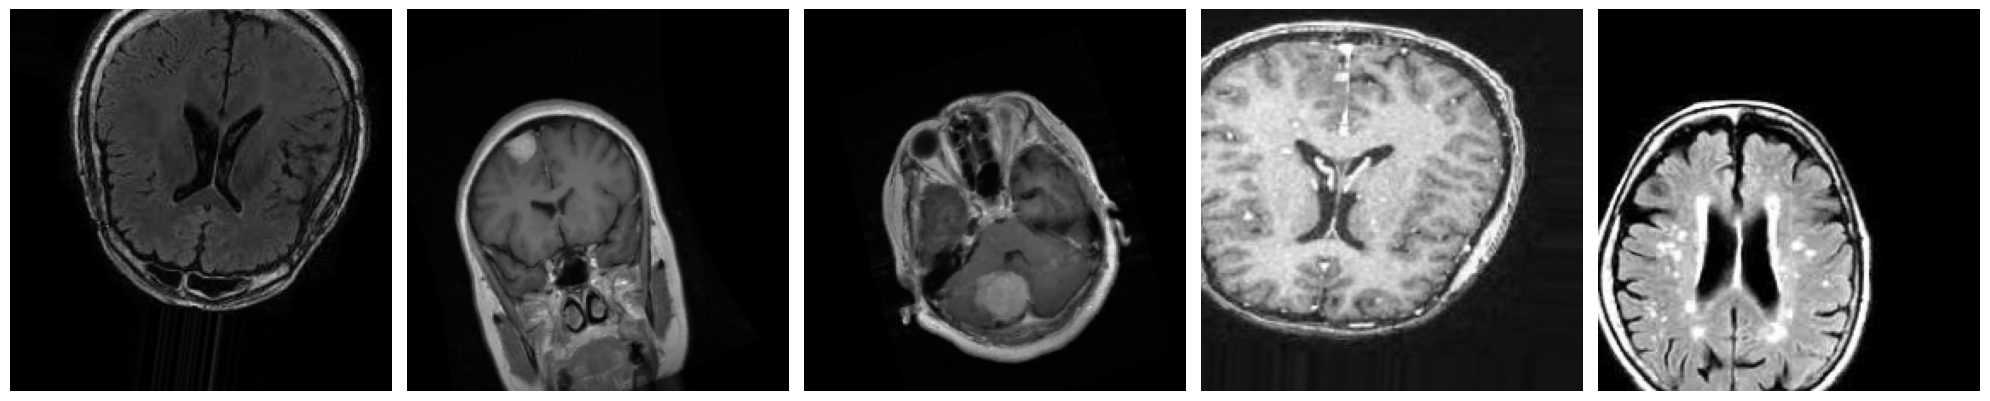

In [29]:
import matplotlib.pyplot as plt

# Function to plot a grid of images
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Get a batch of images from the training data
images, labels = next(train_data)

# Plot the images
plot_images(images[:5])


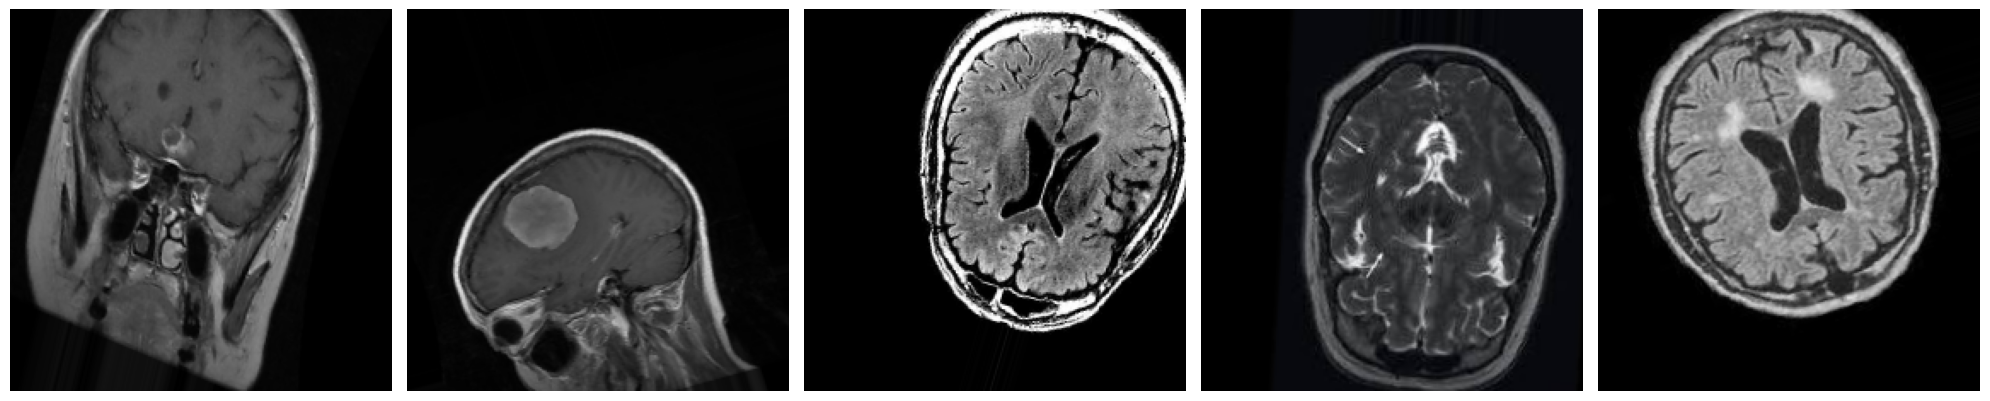

In [30]:
# Display augmented images
augmented_images, _ = next(train_data)  # Get a batch of augmented images

# Plot augmented images
plot_images(augmented_images[:5])


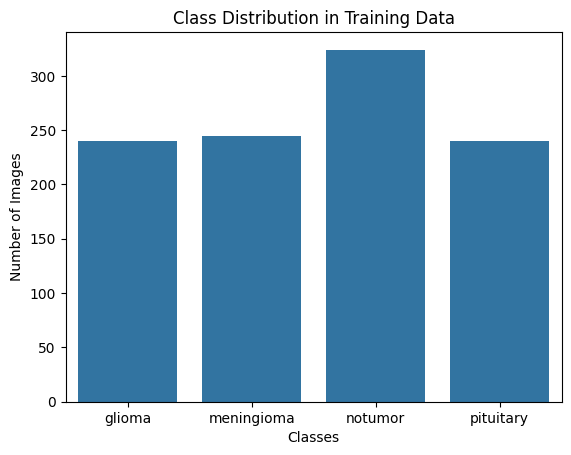

In [31]:
import seaborn as sns
from collections import Counter

# Get class indices and labels
class_labels = list(train_data.class_indices.keys())
class_counts = Counter(train_data.classes)

# Plot the distribution of classes
sns.barplot(x=class_labels, y=[class_counts[i] for i in range(len(class_labels))])
plt.title('Class Distribution in Training Data')
plt.ylabel('Number of Images')
plt.xlabel('Classes')
plt.show()


In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the output
    layers.Flatten(),

    # Adding Dropout before the dense layers to prevent overfitting
    layers.Dropout(0.2),  # 50% dropout rate

    # Fully connected layers
    layers.Dense(128, activation='relu'),

    # Output layer for 4 classes
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [39]:
# Train the model
history = model.fit(train_data, validation_data=val_data, epochs=40, batch_size=32)


Epoch 1/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 18s 464ms/step - accuracy: 0.6862 - loss: 0.7784 - val_accuracy: 0.5954 - val_loss: 1.0169
Epoch 2/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 18s 456ms/step - accuracy: 0.6744 - loss: 0.7265 - val_accuracy: 0.5878 - val_loss: 1.0984
Epoch 3/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 462ms/step - accuracy: 0.7034 - loss: 0.6788 - val_accuracy: 0.5305 - val_loss: 1.4254
Epoch 4/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 19s 472ms/step - accuracy: 0.7322 - loss: 0.6351 - val_accuracy: 0.6031 - val_loss: 1.0954
Epoch 5/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 503ms/step - accuracy: 0.7183 - loss: 0.6847 - val_accuracy: 0.5802 - val_loss: 1.1894
Epoch 6/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 19s 481ms/step - accuracy: 0.7042 - loss: 0.6996 - val_accuracy: 0.5382 - val_loss: 1.2972
Epoch 7/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 19s 480ms/step - accuracy: 0.7466 - loss: 0.6131 - val_accuracy: 0.5916 - val_loss: 1.0552
Epoch 8/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 447ms/step - accuracy: 0.7249 - loss: 0.6730 - val_accu

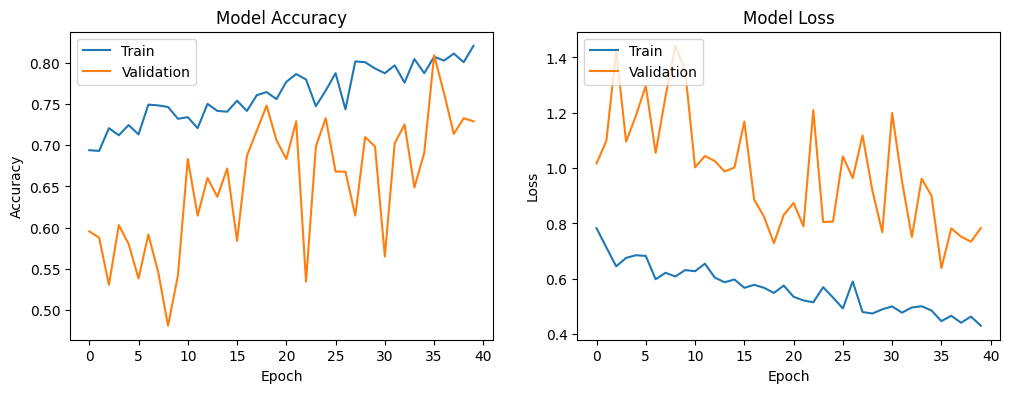

In [40]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show the plots
plt.show()


In [44]:
# Load the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/test',  # Directory containing test images
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,  # Batch size
    class_mode='categorical',  # For multi-class classification
    shuffle=False  # Don't shuffle the data
)

# Get the true labels from the test data
true_classes = test_data.classes  # True labels of the test set


Found 1311 images belonging to 4 classes.


In [45]:
# Make predictions on the test data
predictions = model.predict(test_data)

# Convert the predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 183ms/step


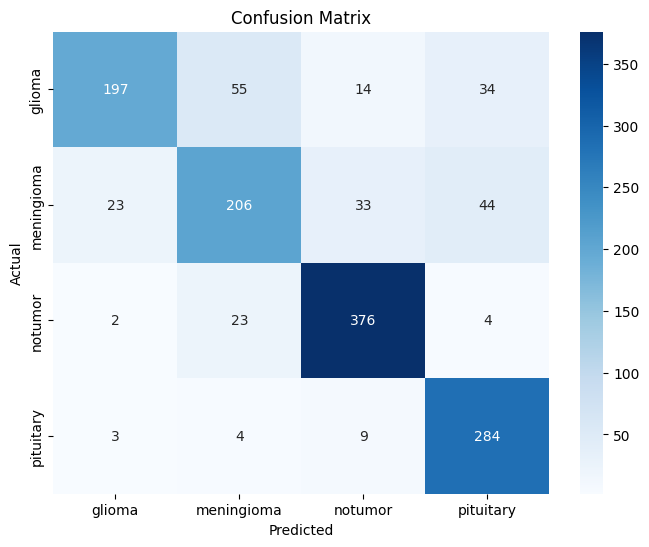

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
